# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [89]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [90]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [91]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [92]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [93]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error





In [94]:
# Build the matrixes
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']

X.shape, y.shape

((506, 13), (506,))

In [95]:
# Separate dataframe into Test sets and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [96]:
# Initialize our model
housing_model = LinearRegression()

# Perform the fitting with X_train & y_train
housing_model.fit(X_train, y_train)

# Implement prediction model with X_test to check if it's similiar to y_test
y_predict_test = housing_model.predict(X_test)
y_predict_train = housing_model.predict(X_train)

## 3. Calculate and print R-squared for both the training and the testing set.

In [97]:
# Calculate the r square score
r2_score_train = r2_score(y_train, y_predict_train)
r2_score_test = r2_score(y_test, y_predict_test)

r2_score_train, r2_score_test


(0.7269553397786701, 0.7725257067368454)

## 4. Calculate and print mean squared error for both the training and the testing set.

In [98]:
# Calculate the MSE for train and test sets
mse_train = mean_squared_error(y_train, y_predict_train)
mse_test = mean_squared_error(y_test, y_predict_test)

mse_train, mse_test


(21.86707194627289, 22.980456449861205)

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [99]:
# Calculate the MAE for train and test sets
mae_train = mean_absolute_error(y_train, y_predict_train)
mae_test = mean_absolute_error(y_test, y_predict_test)

mae_train, mae_test

(3.2385034037917215, 3.4995764171510184)

## Classification Model Evaluation

In [100]:
from sklearn.datasets import load_iris
data = load_iris()

In [101]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [102]:
column_names = data.feature_names

In [103]:
df = pd.DataFrame(data['data'],columns=column_names)

In [104]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [105]:
target = pd.DataFrame(data.target)

In [106]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [107]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [108]:
# Build the matrixes
X = df
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X.shape, y.shape

((150, 4), (150, 1))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [109]:
from sklearn.linear_model import LogisticRegression
## train vs cross validation
from sklearn import metrics

from sklearn.model_selection import cross_validate


model = LogisticRegression()

model.fit(X_train, y_train)

y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)



## 8. Calculate and print the accuracy score for both the training and the testing set.

In [110]:
train_accuracy_score = metrics.accuracy_score( y_train, y_predict_train)
test_accuracy_score = metrics.accuracy_score(y_test, y_predict_test)

train_accuracy_score, test_accuracy_score

(0.9821428571428571, 0.9736842105263158)

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [111]:
train_balanced_score = metrics.balanced_accuracy_score( y_train, y_predict_train)
test_balanced_score = metrics.balanced_accuracy_score(y_test, y_predict_test)

train_balanced_score, test_balanced_score


(0.9803921568627452, 0.9791666666666666)

## 10. Calculate and print the precision score for both the training and the testing set.

In [112]:
train_precision_score = metrics.precision_score(y_train, y_predict_train, average='weighted')
test_precision_score = metrics.precision_score(y_test, y_predict_test, average='weighted')

train_precision_score, test_precision_score

(0.9829734219269104, 0.9763157894736842)

## 11. Calculate and print the recall score for both the training and the testing set.

In [113]:
train_recall_score = metrics.recall_score(y_train, y_predict_train, average='weighted')
test_recall_score = metrics.recall_score(y_test, y_predict_test, average='weighted')

train_recall_score, test_recall_score

(0.9821428571428571, 0.9736842105263158)

## 12. Calculate and print the F1 score for both the training and the testing set.

In [114]:
train_F1_score = metrics.f1_score(y_train, y_predict_train, average='weighted')
test_F1_score = metrics.f1_score(y_test, y_predict_test, average='weighted')

train_F1_score, test_F1_score

(0.982084879406308, 0.9739522830846216)

## 13. Generate confusion matrices for both the training and the testing set.

In [115]:
cm_train = metrics.confusion_matrix(y_train, y_predict_train)
cm_test = metrics.confusion_matrix(y_test, y_predict_test)
cm_train, cm_test

(array([[37,  0,  0],
        [ 0, 32,  2],
        [ 0,  0, 41]], dtype=int64),
 array([[13,  0,  0],
        [ 0, 15,  1],
        [ 0,  0,  9]], dtype=int64))

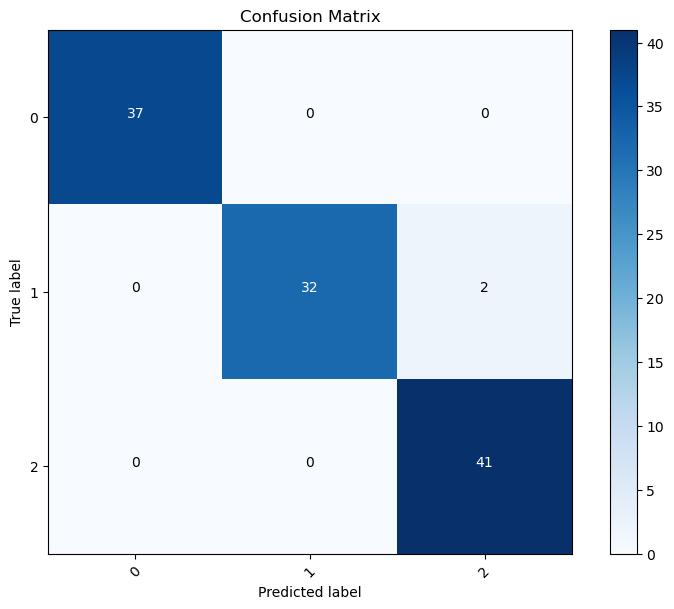

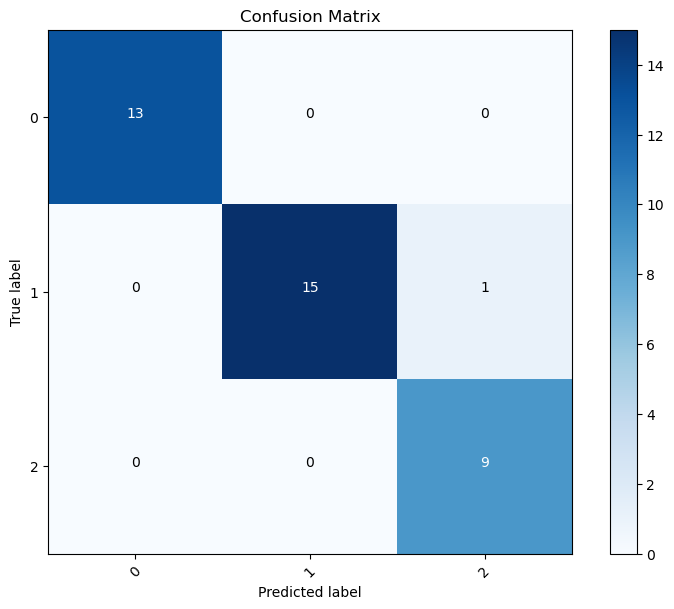

In [116]:
def plot_confusion_matrix(y, y_pred):
    # Generate the confusion matrix
    cm = metrics.confusion_matrix(y, y_pred)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    # Adding tick marks and labels for clarity
    classes = np.unique(y)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Adding text annotations to each cell in the confusion matrix
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(y_train, y_predict_train)
plot_confusion_matrix(y_test, y_predict_test)

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [117]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Define train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Initialize model
model_KNN = KNeighborsClassifier()

# Fit model
model_KNN.fit(X_train, y_train)

# Calculate predictions for train and test sets
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

# Evaluate scores

#1. Accuracy Score
train_accuracy_score = metrics.accuracy_score( y_train, y_predict_train)
test_accuracy_score = metrics.accuracy_score(y_test, y_predict_test)
print(f'Accuracy Scores: {train_accuracy_score, test_accuracy_score}')


#2. Balanced Score
train_balanced_score = metrics.balanced_accuracy_score( y_train, y_predict_train)
test_balanced_score = metrics.balanced_accuracy_score(y_test, y_predict_test)
print(f'Balanced Scores: {train_balanced_score, test_balanced_score}')

#3. Precision Score
train_precision_score = metrics.precision_score(y_train, y_predict_train, average='weighted')
test_precision_score = metrics.precision_score(y_test, y_predict_test, average='weighted')
print(f'Precision Scores: {train_precision_score, test_precision_score}')

#4. Recall Score
train_recall_score = metrics.recall_score(y_train, y_predict_train, average='weighted')
test_recall_score = metrics.recall_score(y_test, y_predict_test, average='weighted')
print(f'Precision Scores: {train_recall_score, test_recall_score}')

#5. F1 Score
train_F1_score = metrics.f1_score(y_train, y_predict_train, average='weighted')
test_F1_score = metrics.f1_score(y_test, y_predict_test, average='weighted')
print(f'F1 Scores: {train_F1_score, test_F1_score}')

#6. Confusion Matrix
cm_train = metrics.confusion_matrix(y_train, y_predict_train)
cm_test = metrics.confusion_matrix(y_test, y_predict_test)
print(f'Confusion Matrix: {cm_train, cm_test}')





Accuracy Scores: (0.9821428571428571, 0.9736842105263158)
Balanced Scores: (0.9803921568627452, 0.9791666666666666)
Precision Scores: (0.9829734219269104, 0.9763157894736842)
Precision Scores: (0.9821428571428571, 0.9736842105263158)
F1 Scores: (0.982084879406308, 0.9739522830846216)
Confusion Matrix: (array([[37,  0,  0],
       [ 0, 32,  2],
       [ 0,  0, 41]], dtype=int64), array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64))


In [118]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Define train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Initialize model
model_Tree = KNeighborsClassifier(n_neighbors=3)

# Fit model
model_Tree.fit(X_train, y_train)

# Calculate predictions for train and test sets
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

# Evaluate scores
class_report_train = metrics.classification_report(y_predict_train, y_train)
class_report_test = metrics.classification_report(y_predict_test, y_test)
print(class_report_train)
print(class_report_test)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.94      1.00      0.97        32
           2       1.00      0.95      0.98        43

    accuracy                           0.98       112
   macro avg       0.98      0.98      0.98       112
weighted avg       0.98      0.98      0.98       112

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        15
           2       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [119]:
# Decision Tree
from sklearn.svm import SVC

# Define train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Initialize model
model_Tree = SVC()

# Fit model
model_Tree.fit(X_train, y_train)

# Calculate predictions for train and test sets
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

# Evaluate scores
class_report_train = metrics.classification_report(y_predict_train, y_train)
class_report_test = metrics.classification_report(y_predict_test, y_test)
print(class_report_train)
print(class_report_test)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.94      1.00      0.97        32
           2       1.00      0.95      0.98        43

    accuracy                           0.98       112
   macro avg       0.98      0.98      0.98       112
weighted avg       0.98      0.98      0.98       112

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        15
           2       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

